## iris-visualization-tip

- sepal length : 꽃받침 조각 길이
- petal length : 꽃잎 길이
- sepal width : 꽃받침 조각 넓이
- petal width : 꽃잎 넓이

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./iris_train.csv')
test = pd.read_csv('./iris_test.csv')

In [3]:
train.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [4]:
train.nunique()

id                   75
species               3
sepal length (cm)    31
petal length (cm)    35
sepal width (cm)     20
petal width (cm)     20
dtype: int64

- species가 3 종인 것으로 보아 어떤 종류 가 있는지 살펴볼 수 있다

In [5]:
train['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
train.columns = ['id', 'species', 'sepal_length', 'petal_length', 'sepal_width', 'petal_width']

In [7]:
train[train['species'] == 'setosa'].count()

id              15
species         15
sepal_length    15
petal_length    15
sepal_width     15
petal_width     15
dtype: int64

### 기본 BoxPlot

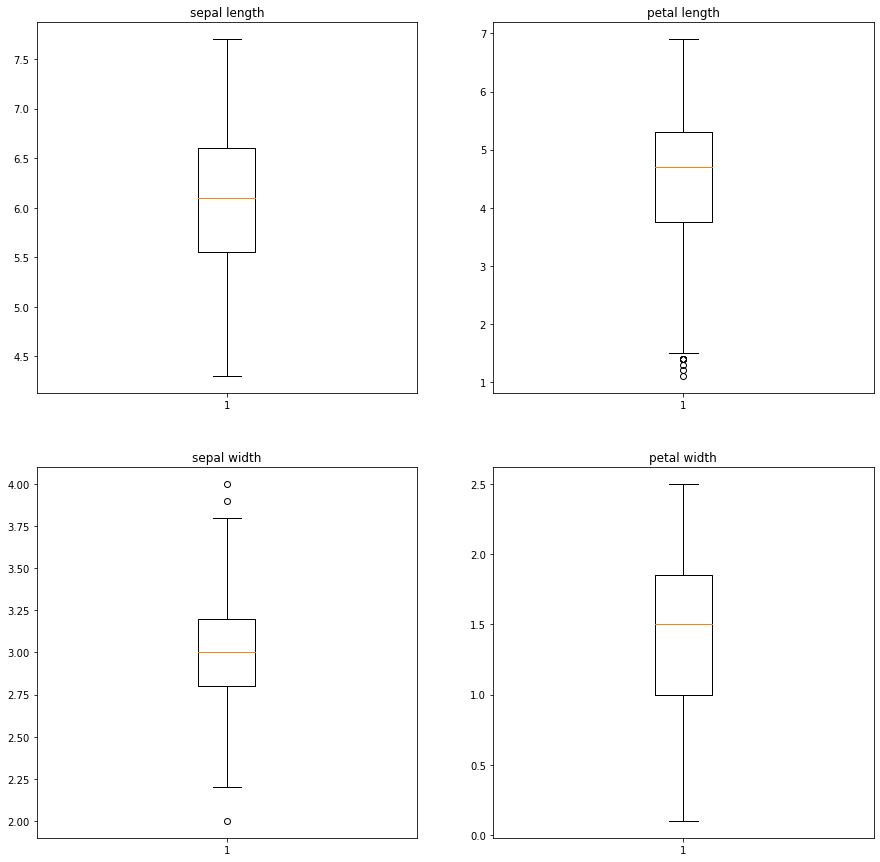

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].boxplot(train['sepal_length'])
axs[0, 0].set_title('sepal length')

axs[0, 1].boxplot(train['petal_length'])
axs[0, 1].set_title('petal length')

axs[1, 0].boxplot(train['sepal_width'])
axs[1, 0].set_title('sepal width')

axs[1, 1].boxplot(train['petal_width'])
axs[1, 1].set_title('petal width')

plt.show()

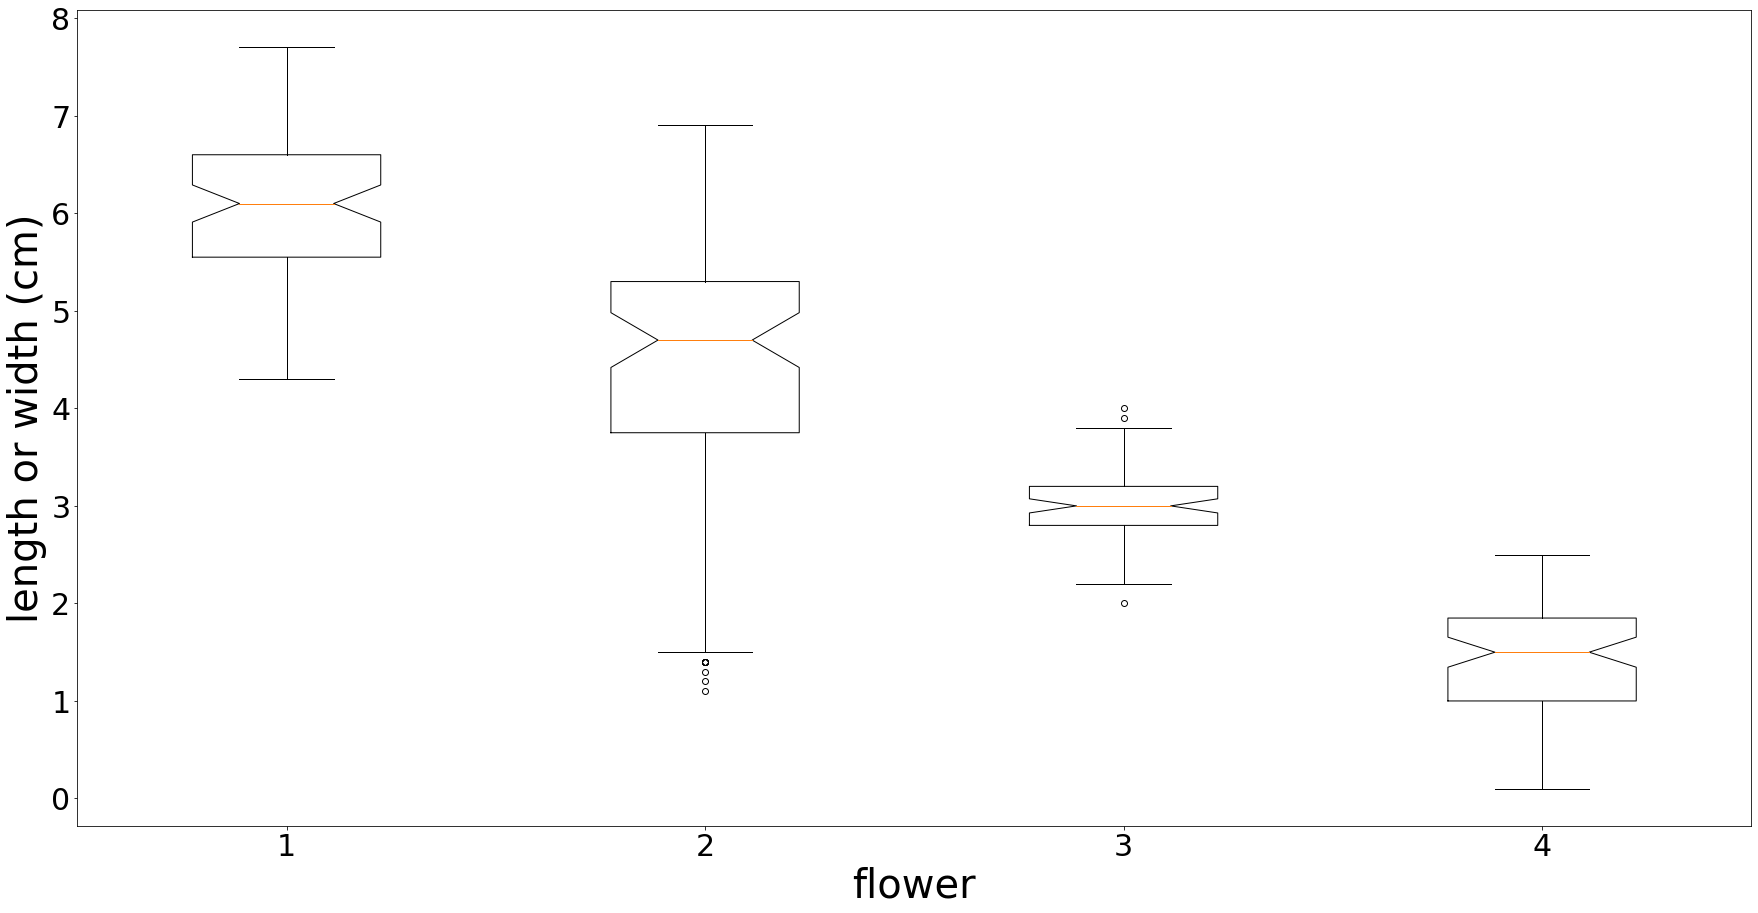

In [9]:
# 데이터 모음집
data = [train['sepal_length'], train['petal_length'], 
        train['sepal_width'], train['petal_width']]

fig, ax = plt.subplots(figsize=(30, 15))

bp = ax.boxplot(data, notch=True)

ax.set_xlabel('flower', fontsize = 40)
ax.set_ylabel('length or width (cm)', fontsize = 40)
ax.tick_params(axis='x', labelsize = 30)
ax.tick_params(axis='y', labelsize = 30)
plt.show()

### Violin plot

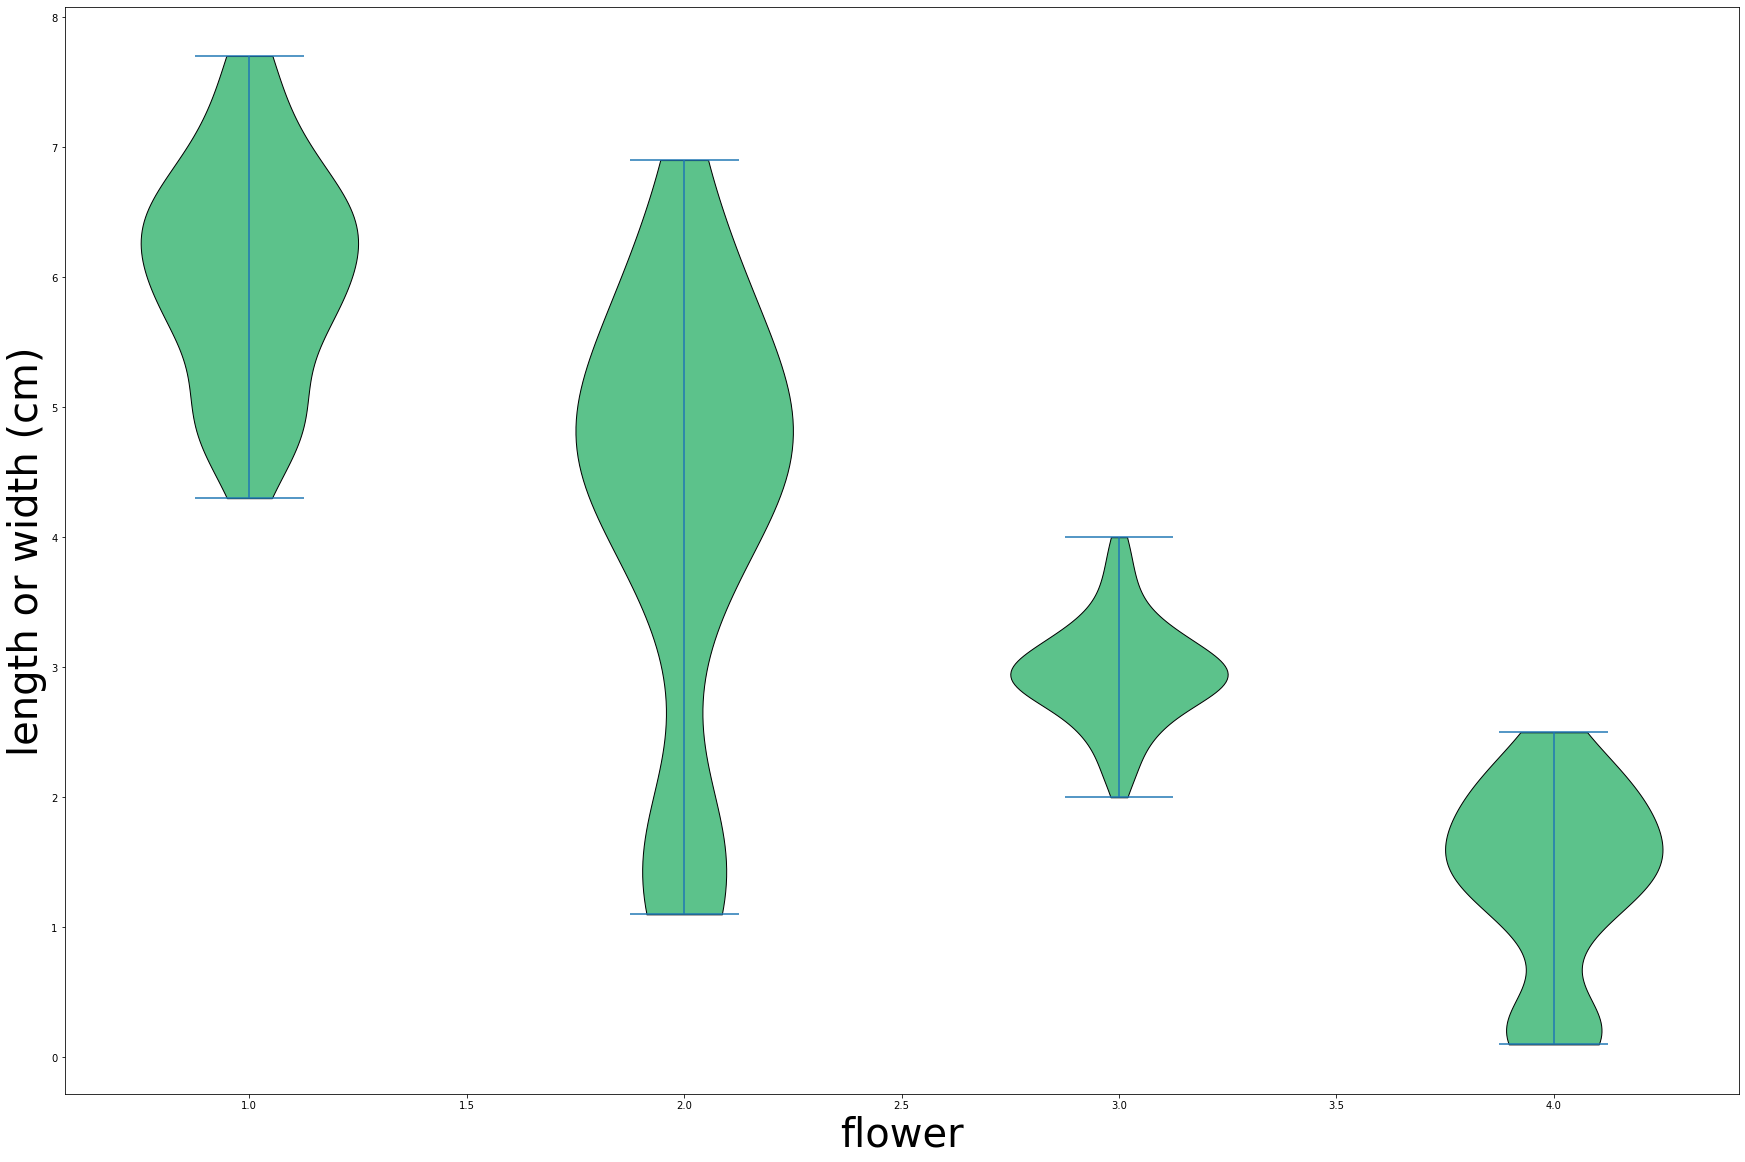

In [10]:
fig, ax = plt.subplots(figsize = (30, 20))

ax.set_xlabel('flower', fontsize = 40)
ax.set_ylabel('length or width (cm)', fontsize = 40)
parts = ax.violinplot(data, showmeans = False, showmedians=False)

ax.xaxis.set_tick_params(direction = 'out')
ax.xaxis.set_ticks_position('bottom')

for pc in parts['bodies']:
    pc.set_facecolor('#5cc28b')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

plt.show()

### Scatter

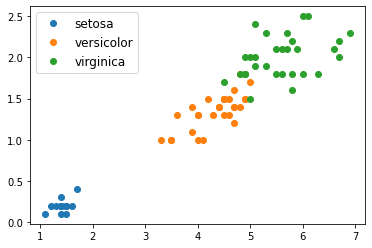

In [14]:
species = train.groupby('species')

fig, ax = plt.subplots()
for name, kind in species:
    ax.plot(kind.petal_length, kind.petal_width, marker = 'o', linestyle='', label = name)

ax.legend(fontsize = 12, loc = 'upper left')
plt.show()

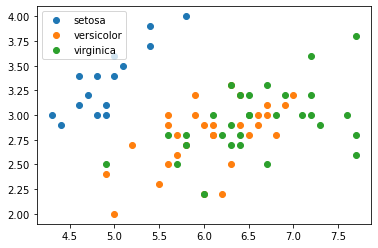

In [16]:
fig, ax = plt.subplots()

for name, kind in species:
    ax.plot(kind.sepal_length, kind.sepal_width, marker = 'o', 
            linestyle = '', label = name)

ax.legend(fontsize = 10, loc = 'upper left')
plt.show()

### Bar plot

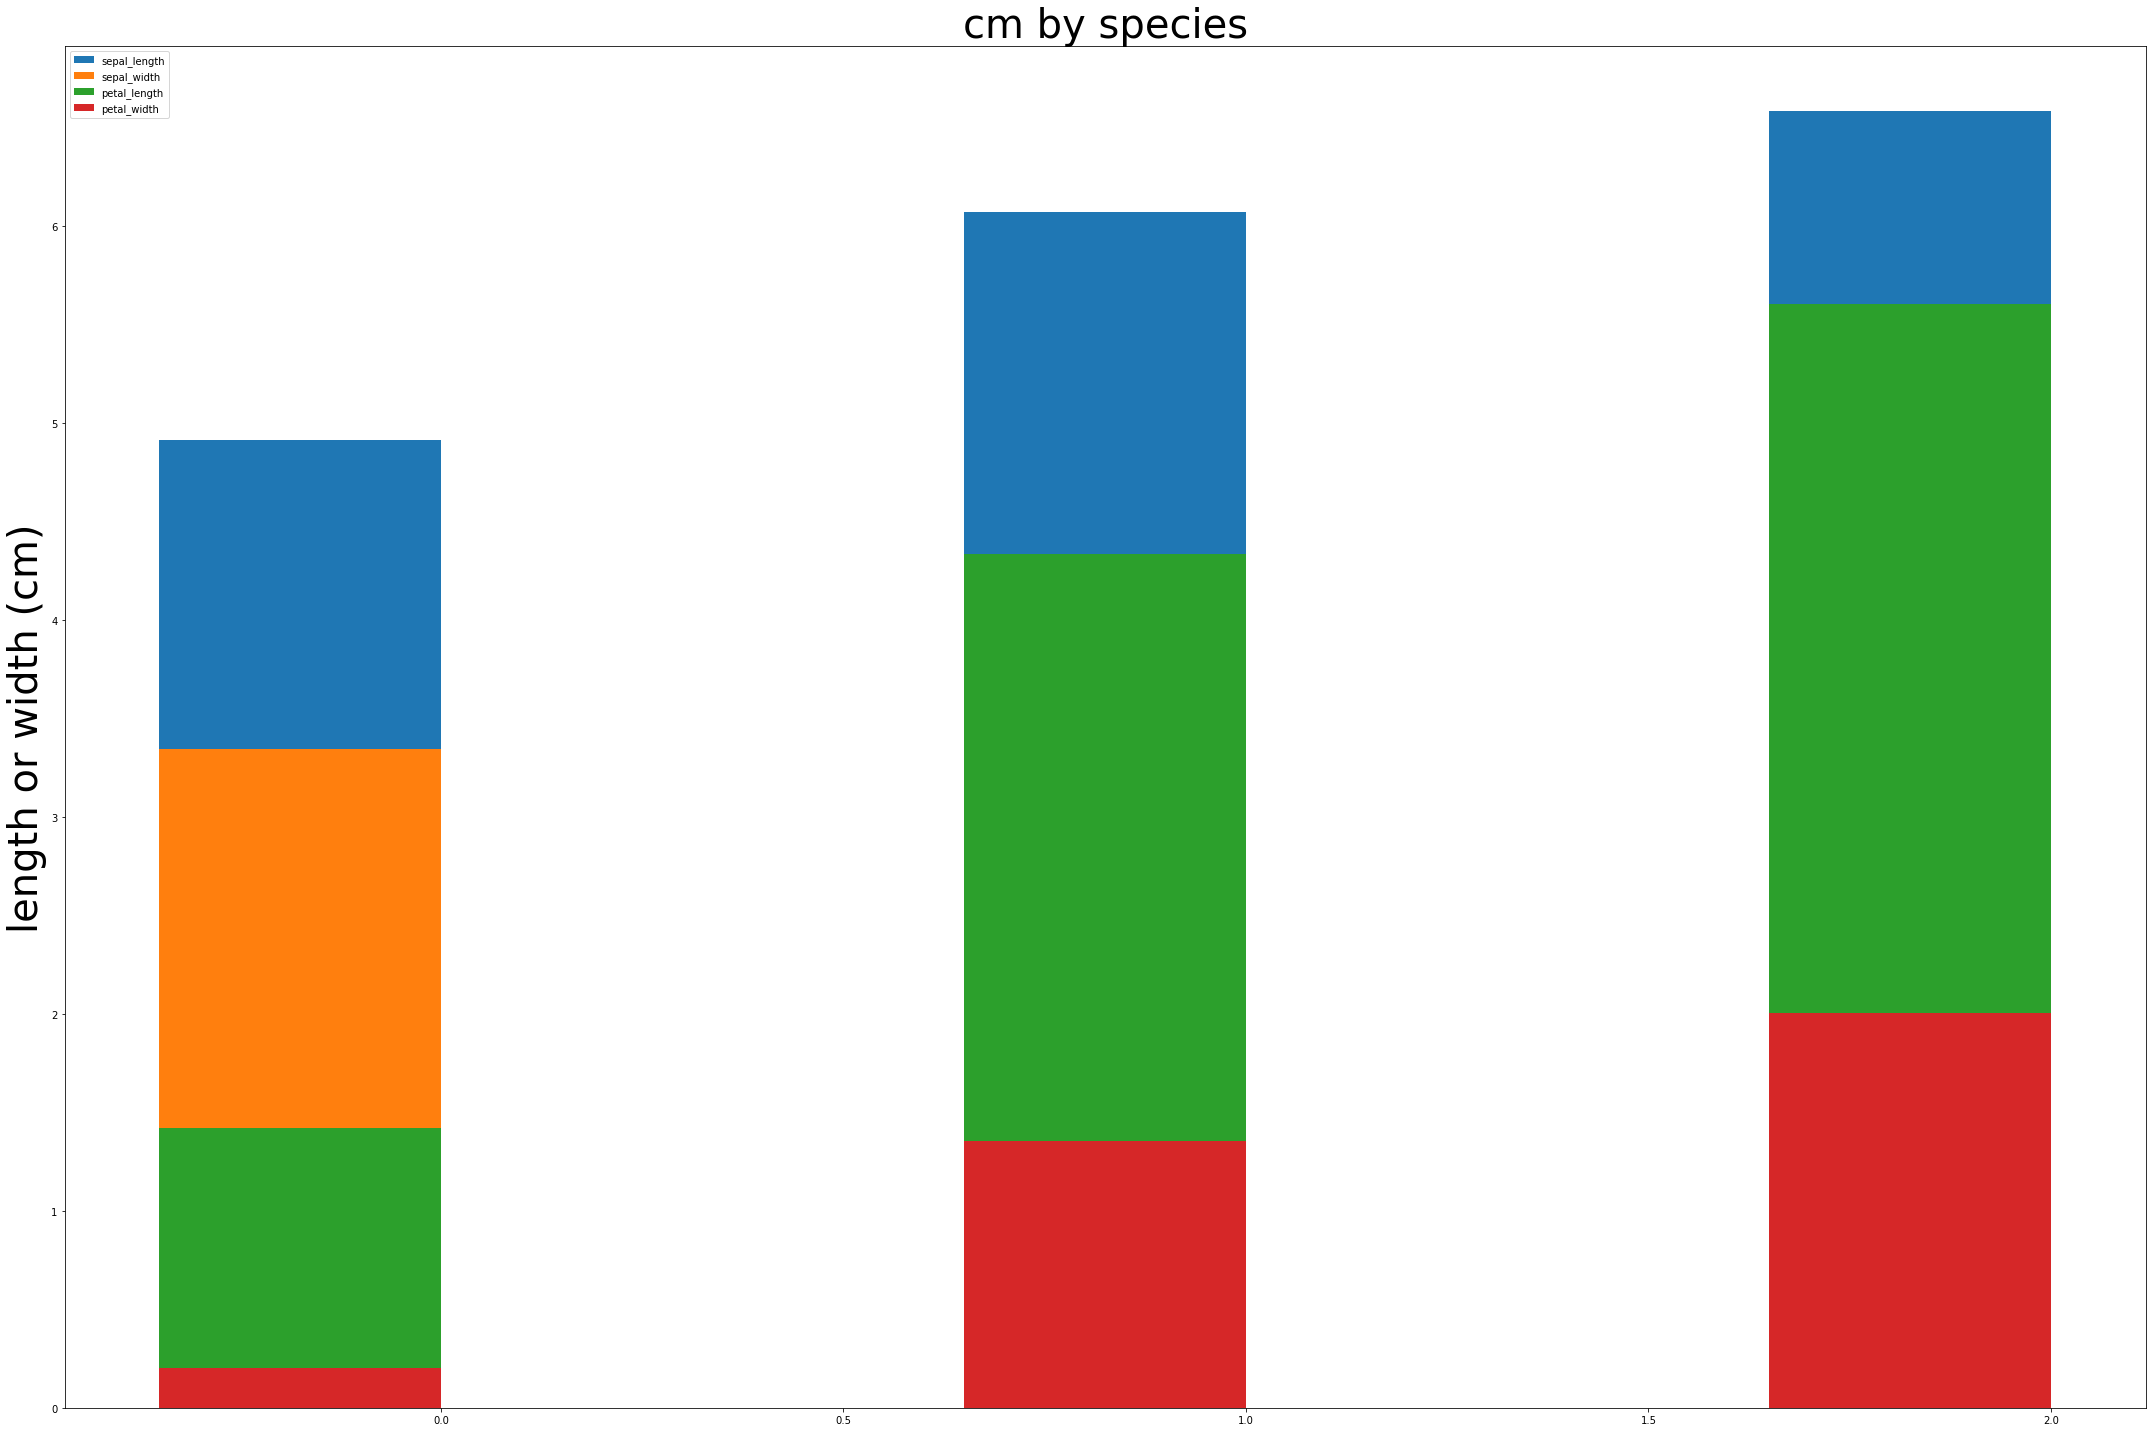

In [32]:
sepal_length_mean = []
sepal_width_mean = []
petal_length_mean = []
petal_width_mean = []
label = ['setosa', 'versicolor', 'virginica']

# 종류를 기준으로 각 index 별로 평균 값을 더함
for name, kind in species:
    sepal_length_mean.append(kind.sepal_length.mean())
    sepal_width_mean.append(kind.sepal_width.mean())
    petal_length_mean.append(kind.petal_length.mean())
    petal_width_mean.append(kind.petal_width.mean())

x = np.arange(len(label))
width = 0.35
    
fig, ax = plt.subplots(figsize = (30, 20))
sepal_length_bar = ax.bar(x-width/2, sepal_length_mean, width, label='sepal_length')
sepal_width_bar = ax.bar(x-width/2, sepal_width_mean, width, label='sepal_width')
petal_length_bar = ax.bar(x-width/2, petal_length_mean, width, label='petal_length')
petal_width_bar = ax.bar(x-width/2, petal_width_mean, width, label='petal_width')

ax.set_ylabel('length or width (cm)', fontsize = 40)
ax.set_title('cm by species', fontsize = 40)
ax.legend()

fig.tight_layout()

plt.show()

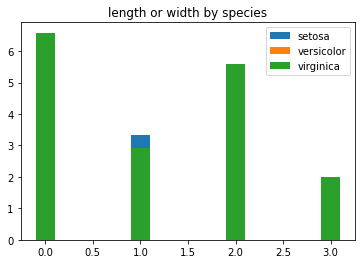

In [43]:
setasa_data = species.get_group('setosa')
versicolor_data = species.get_group('versicolor')
virginica_data = species.get_group('virginica')

sp = ['setosa', 'versicolor', 'virginica']
label = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
setosa = [setasa_data.sepal_length.mean(),
         setasa_data.sepal_width.mean(),
         setasa_data.petal_length.mean(),
         setasa_data.petal_width.mean()]
versicolor = [versicolor_data.sepal_length.mean(),
         versicolor_data.sepal_width.mean(),
         versicolor_data.petal_length.mean(),
         versicolor_data.petal_width.mean()]
virginica = [virginica_data.sepal_length.mean(),
         virginica_data.sepal_width.mean(),
         virginica_data.petal_length.mean(),
         virginica_data.petal_width.mean()]


fig, ax = plt.subplots()

ind = np.arange(4)
width = 0.2

ax.bar(ind, setosa, width, label = 'setosa')
ax.bar(ind, versicolor, width, label = 'versicolor')
ax.bar(ind, virginica, width, label = 'virginica')

ax.set_title('length or width by species')

ax.legend()
plt.show()

- 여기서 참고해야 되는 것은 Groupby Bar Chart는 2개 기준이지 3개로 넘어갈 경우에는 matplotlib을 사용하지 않는 것을 